<a href="https://colab.research.google.com/github/MinhoJu/SRT/blob/master/WTI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [131]:
# Import matplotlib 
from pandas_datareader import data
import pandas_datareader as pdr
import datetime 
from datetime import date
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 16), dpi=80, facecolor='w', edgecolor='k')

df = pd.DataFrame()
wti_dict = dict()

start = datetime.datetime(2020, 3, 1)
end = date.today()

# KODEX WTI
kodex_wti = pdr.get_data_yahoo('261220.KS', start=start, end=end)
df['KODEX WTI'] = (kodex_wti['Close']*47.18) /16500

# Ours
df['SA_JU'] = (kodex_wti['Close']*0) + 25.01

# WTI Fund (KR5105924298)
link = 'http://m.samsungfund.com/retFundPrice_Excel.action?fId=1M2101&officeCoCd=0030200000&currencyCd='
df_excel = pd.read_excel(link,'www.samsungfund.com')
df_excel['일자'] = pd.to_datetime(df_excel['일자'])
data = df_excel.to_numpy()
columns = ['Close', 'Diff', 'Close2', 'Diff2']
df_wti_fund = pd.DataFrame(data=data[0:,1:],
                  index=data[0:,0],
                  columns=columns)
df_wti_fund['Close'] = df_wti_fund['Close'].astype(float)
df_wti_fund['Close'] = (df_wti_fund['Close']*47.18) / 287.98
df['KR5105924298'] = df_wti_fund['Close']

# WTI
wti_cl = pdr.get_data_yahoo('CL=F', start=start, end=end)
wti_dict['CL=F'] = wti_cl
df['WTI'] = wti_cl['Close']

# WTI Futures
symbols = ['CLM20.NYM', 'CLN20.NYM', 'CLQ20.NYM', 'CLU20.NYM', 'CLV20.NYM', 'CLX20.NYM', 'CLZ20.NYM']

for symbol in symbols:
  wti = pdr.get_data_yahoo(symbol, start=start, end=end)
  wti_dict[symbol] = wti


for index in range(3):
  month = index + 6
  df['2020-%d'%month] = wti_dict[symbols[index]]['Close']

df.fillna(method='ffill', inplace=True)

<Figure size 1600x1280 with 0 Axes>

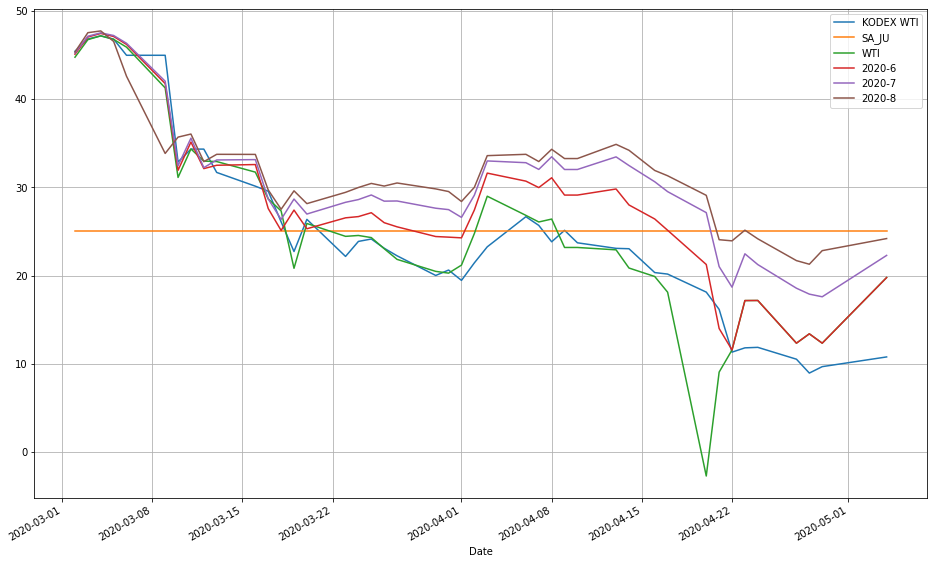

In [129]:
# Show plot
df.plot(grid=True, figsize=(16, 10))
#df.plot(grid=True)
plt.show()

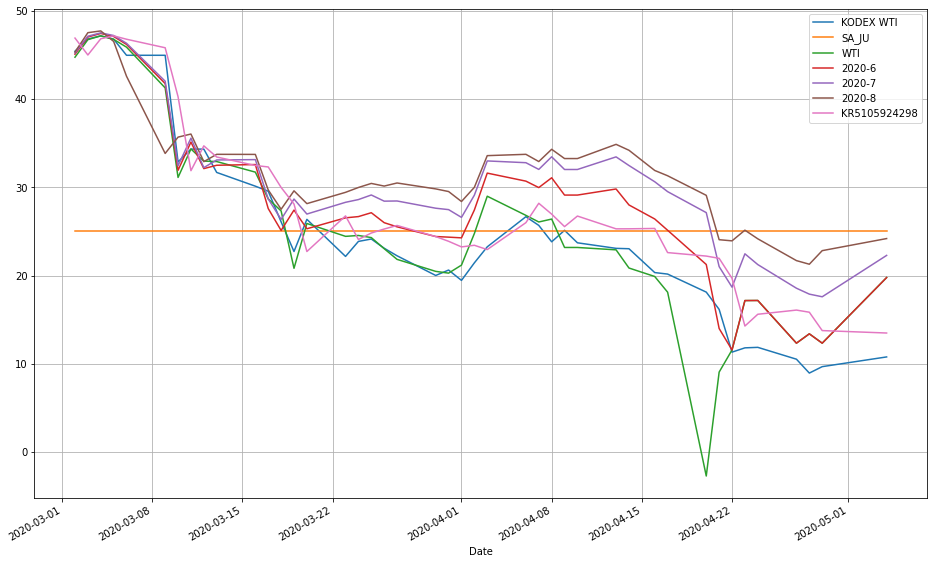

2020-05-05    16.576403
2020-05-04    13.491468
2020-05-03    13.491468
2020-05-02    13.491468
2020-05-01    13.493106
                ...    
2020-02-10    51.318367
2020-02-09    51.318367
2020-02-08    51.320005
2020-02-07    51.280685
2020-02-06    50.065061
Name: Close, Length: 90, dtype: float64


,KODEX WTI,SA_JU,WTI,2020-6,2020-7,2020-8,KR5105924298
Date,,,,,,,
2020-04-24,11.866485,25.01,17.180000,17.180000,21.250000,24.170000,15.617992
2020-04-27,10.522570,25.01,12.340000,12.340000,18.570000,21.700001,16.091463
2020-04-28,8.949903,25.01,13.400000,13.400000,17.900000,21.290001,15.848994
2020-04-29,9.679048,25.01,12.340000,12.340000,17.600000,22.830000,13.766704
2020-05-04,10.779915,25.01,19.780001,19.780001,22.290001,24.200001,13.491468


In [130]:
import numpy as np
import pandas as pd

link = 'http://m.samsungfund.com/retFundPrice_Excel.action?fId=1M2101&officeCoCd=0030200000&currencyCd='
df_excel = pd.read_excel(link,'www.samsungfund.com')
df_excel['일자'] = pd.to_datetime(df_excel['일자'])
data = df_excel.to_numpy()

# df_excel.head()

columns = ['Close', 'Diff', 'Close2', 'Diff2']

df_wti_fund = pd.DataFrame(data=data[0:,1:],
                  index=data[0:,0],
                  columns=columns)

# df_wti_fund.head()
df_wti_fund['Close'] = df_wti_fund['Close'].astype(float)

# wti_dict['KR5105924298'] = df_wti_fund
# print(df_wti_fund['Close'])

df_wti_fund['Close'] = (df_wti_fund['Close']*47.18) / 287.98
# print(df_wti_fund['Close'])

df['KR5105924298'] = df_wti_fund['Close']

# print(df_wti_fund['Close'])
# print(df['KR5105924298'])?

df.tail()

# print(df['WTI']['2020-05-04'])
# print(df['KR5105924298']['2020-05-04'])
# print(df_wti_fund['Close']['2020-05-04'])

# df_row = pd.concat([df, df_wti_fund['Close']])
# df_row.head(60)

# df['KR5105924298'].describe()

# Show plot
df.plot(grid=True, figsize=(16, 10))
#df.plot(grid=True)
plt.show()

print(df_wti_fund['Close'])

df.tail()